**数学规划：** 在给定条件下（约束条件），按某一指标（目标函数）来寻找最优方案（极值及其对应的解）——资源分配。

**数学规划分类：**
- 线性规划：目标函数&约束条件都是线性表达式。解法：单纯形法
- 非线性规划：含有非线性表达式。解法：需要确定初始点，搜索法
- 整数规划：
    - 线性整数规划
    - 非线性整数规划：蒙特卡洛等概率算法
- 0-1规划：特殊的整数规划



# 一、线性规划
   常见问题情景：生产规划问题（资源分配）
   
### 1、scipy.optimize.linprog
   SciPy的**scipy.optimize**模块提供了一个求解**线性规划**的函数linprog。这个函数集中了求解线性规划的常用算法，如单纯形法和内点法，会根据问题的规模或用户的指定选择算法进行求解。
   
   问题的标准形为：
    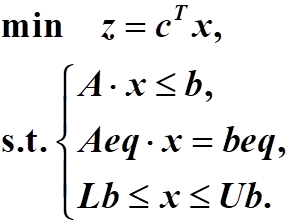
    
   该函数会返回一个OptimizeResult对象，包含了线性规划问题的求解结果和其他属性信息。
   - x：最优解，是一个一维数组。
   - fun：目标函数的最优值。
   - slack：松弛变量，是一个一维数组。
   - success：求解是否成功的标志，是一个布尔值。
   - message：求解状态的信息。
   - nit：迭代次数。
   - status：求解状态的代码，可以是0（求解成功）、1（求解失败：可能是因为问题无可行解或无界解）、2（求解中断：可能是因为达到最大迭代次数或出现数值问题）

数学建模算法与应用例1.2
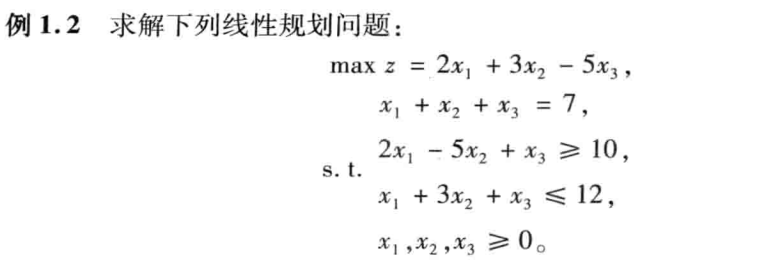

首先化为标准型：

$min z = -2x_1-3x_2+5x_3$

$$
s.t.
 \left\{\begin{matrix}-2x_1+5x_2-x_3\le -10
 \\x_1+3x_2+x_3\le 12
 \\x_1+x_2+x_3=7
 \\x_1,x_2,x_3\ge 0
\end{matrix}\right.
$$

In [1]:
import numpy as np
from scipy.optimize import linprog
c = [-2,-3,5]                          # c对应于上述标准型中的目标向量
A = [[-2,5,-1],[1,3,1]]                # A、b对应于不等号约束
b = [-10,12]
Aeq = [[1,1,1]]                        # Aeq、beq对应于等号约束
beq = [7,]
bounds = [[0,None],[0,None],[0,None]]# bounds是决策向量的下界向量和上界向量所组成的个元素的元组
res = linprog(c,A,b,Aeq,beq,bounds)
print("最优值：",res.fun)
print("最优解：",res.x)
print("slack:",res.slack)

最优值： -14.571428571428571
最优解： [6.42857143 0.57142857 0.        ]
slack: [0.         3.85714286]


应注意A、Aeq的维度应是二维数组，注意bounds的格式（默认每个决策变量下界为0，上界为正无穷）。
缺省参数用None替代。



下面手动增加松弛变量化为严格标准型，检验一下对结果是否有影响：

$min z = -2x_1-3x_2+5x_3+0x_4+0x_5$

$$
s.t.
 \left\{\begin{matrix}-2x_1+5x_2-x_3+x_4= -10
 \\x_1+3x_2+x_3+x_5= 12
 \\x_1+x_2+x_3=7
 \\x_1,x_2,x_3\ge 0
\end{matrix}\right.
$$

In [4]:
import numpy as np
from scipy.optimize import linprog
c = [-2,-3,5,0,0]                          
Aeq = [[-2,5,-1,1,0],[1,3,1,0,1],[1,1,1,0,0]]                
beq = [-10,12,7]
bounds = [[0,None],[0,None],[0,None],[0,None],[0,None]]
res = linprog(c,None,None,Aeq,beq,bounds)
print("最优值：",res.fun)
print("最优解：",res.x)
print("slack:",res.slack)

最优值： -14.57142857142857
最优解： [6.42857143 0.57142857 0.         0.         3.85714286]
slack: []


### 2、cvxopt.slovers
   用于建模和求解凸优化问题。它提供了一种简单直观的方式来表达优化问题，并支持多种求解器
   内置求解器包括：
   - cvxopt.solvers.lp：线性规划求解器。
   - cvxopt.solvers.qp：二次规划求解器。
   - cvxopt.solvers.sdp：半正定规划求解器。
   - cvxopt.solvers.cp：凸优化求解器。
   - cvxopt.solvers.conelp：线性和二次规划混合整数规划求解器。
   - cvxopt.solvers.miqp：混合整数二次规划求解器。
   
   标准型：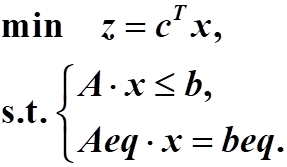
   
   cvxopt.solvers.lp(c, G, h, A=None, b=None, solver=None, \**kwargs)
   - c：目标函数的系数，是一个列向量。
   - G：不等式约束矩阵，每行表示一个不等式约束，每列表示一个变量。
   - h：不等式约束上界，是一个列向量。
   - A：等式约束矩阵，每行表示一个等式约束，每列表示一个变量。默认值为None，表示没有等式约束。
   - b：等式约束右侧向量，是一个列向量。默认值为None，表示没有等式约束。
   - solver：指定求解器，可以是'glpk'或'mosek'。默认值为None，表示使用内置求解器。

   返回一个字典,该字典包含以下键值对：
   - 'x'：最优解，是一个列向量。
   - 'y'：拉格朗日乘子，是一个列向量。
   - 'z'：松弛变量，是一个列向量。
   - 's'：KKT条件残差，是一个列向量。
   - 'status'：求解状态，可以是'optimal'（最优解）、'infeasible'（无可行解）、'unbounded'（无界解）或'unknown'（求解失败）。
   - 'gap'：最优值与对偶最优值之间的差距。
   - 'primal objective'：目标函数的最优值。
   - 'dual objective'：对偶问题的最优值。
   
   写代码时注意的是：
   1. 系数矩阵以列向量的形式给出
   2. 变量范围约束当成不等约束给出

In [1]:
import numpy as np #必加
from cvxopt import matrix,solvers

c = matrix([-2.,-3.,5.])
G = matrix([[-2.0,1.0,-1.0,0.0,0.0],[5.0,3.0,0.0,-1.0,0.0],[-1.0,1.0,0.0,0.0,-1.0]])
h = matrix([-10.0,12.0,0,0,0])
A = matrix([[1.],[1.],[1.]])
b = matrix([7.0])

sol = solvers.lp(c,G,h,A,b)
print("求解状态：",sol['status'])
print("最优解：",sol['x'])
print("最优值：",sol['y'])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.5149e+00 -6.0990e+00  1e+02  4e-01  5e+00  1e+00
 1: -1.5578e+01 -1.5942e+01  5e+00  3e-02  4e-01  3e-01
 2: -1.4554e+01 -1.4565e+01  1e-01  6e-04  9e-03  5e-03
 3: -1.4571e+01 -1.4571e+01  1e-03  7e-06  1e-04  6e-05
 4: -1.4571e+01 -1.4571e+01  1e-05  7e-08  1e-06  6e-07
 5: -1.4571e+01 -1.4571e+01  1e-07  7e-10  1e-08  6e-09
Optimal solution found.
求解状态： optimal
最优解： [ 6.43e+00]
[ 5.71e-01]
[-4.25e-09]

最优值： [ 2.29e+00]



### 3、cvxpy库（功能最丰富，可以求解整数规划）
可以解决线性规划、二次规划、半正定规划、凸优化等等

基本使用方式如下：

In [8]:
import cvxpy as cp
import numpy as np

# 导入数据
c = np.array([1, 2, 3])
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([6, 15, 24])

# 定义变量
x = cp.Variable(3, integer=True)  # integer选项控制是否是整数规划

# 定义目标函数
objective = cp.Maximize(c@x)  # 使用@符号代替*符号表示矩阵乘法

# 定义限制条件
constraints = [
    A@x <= b,
    x >= 0,
    x <= 10
]

# 定义优化问题
problem = cp.Problem(objective, constraints)

# 求解优化问题
result = problem.solve()

# 输出最优值和最优解
print("最优值：", problem.value)
print("最优解：", x.value)

# 输出限制条件的松弛度
for i, constraint in enumerate(constraints):
    slack = constraint.dual_value
    print("限制条件{}的松弛度：{}".format(i+1, slack))

最优值： 6.0
最优解： [0. 0. 2.]
限制条件1的松弛度：None
限制条件2的松弛度：None
限制条件3的松弛度：None


在CVXPY中，**矢量**和**矩阵**是不同的概念。矢量是一个列向量或行向量，可以表示为$n\times1$或$1\times n$的矩阵。而矩阵通常指的是一个二维数组，其中包含多行多列的数值。

在1.1及之后的版本中，\*符号只能用于表示矩阵和标量的乘法，矢量和标量的乘法，或是矢量之间的乘法。如果要进行矩阵和矩阵之间的乘法，需要使用**@**符号。

#### 参数化优化
CVXPY支持参数化优化，即将优化问题中的某些参数作为变量，通过求解最优解来确定这些参数的值。这种方法可以帮助用户更好地控制优化问题，同时也可以避免重复求解相似的优化问题。

例如，可以将线性规划问题中的$b$向量作为参数，通过求解最优解来确定$b$的值：
```python
# 定义参数
b = cp.Parameter(3)

# 定义限制条件
constraints = [
    A @ x <= b,
    x >= 0,
    x <= 10
]

# 定义优化问题
problem = cp.Problem(objective, constraints)

# 求解优化问题，并逐步改变参数b的值
for i in range(3):
    # 更新参数b的值
    b.value = np.array([6+i*3, 15+i*3, 24+i*3])
    # 求解优化问题
    result = problem.solve()
    # 输出最优解
    print(x.value)
```

#### 自定义函数
持自定义python函数，可以将自定义函数作为目标函数或限制条件的输入，以便更灵活地进行优化建模和求解。例如，可以定义一个自定义函数$f(x)=\max(0, x)$，并将其作为限制条件输入到CVXPY中
```python
# 定义自定义函数
def relu(x):
    return cp.maximum(0, x)

# 定义变量
x = cp.Variable(3)

# 定义限制条件
constraints = [
    relu(A @ x - b) <= 1
]
```

### 4、geatpy库（遗传算法）
遗传算法非常普适，不仅仅可以用来解决线性规划问题。

Geatpy是一个高性能实用型的Python遗传算法工具箱，提供一个面向对象的进化算法框架，经过全面改版后，新版Geatpy2目前由华南农业大学、暨南大学、华南理工等本硕博学生联合团队开发及维护。

In [ ]:
### 具体代码见《智能算法》

### 3、灵敏度分析
灵敏度分析是指在已知最优解的情况下，分析模型参数或约束条件的变化对最优解的影响。

具体的讲，就是考虑c，A，b等系数波动变化的情况。由此得到两个问题：
- 如果参数中的一个或者几个发生了变化，现行最优方案会有什么变化？
- 将这些参数的变化限制在什么范围内，原最优解仍是最优的？

看slack variable（松弛变量）来判断约束条件是否松弛：
- 如果松弛变量的值为0，那么相应的约束条件是严格满足的；
- 如果松弛变量的值为正数，那么相应的约束条件是松约束的，即在满足约束条件的前提下还有一定的余地；
- 如果松弛变量的值为负数，那么相应的约束条件是过度约束的，即在该约束条件下无法满足其他的约束条件。

**进行灵敏度分析的一般步骤如下：**
1. 求解原始线性规划问题，得到最优解 $x^$ 和最优目标值 $f^$。
2. 对于每个约束条件 $i$，计算对应的松弛变量 $s_i$。如果约束条件是等式形式，则松弛变量为0；如果约束条件是不等式形式，则松弛变量为 $s_i = b_i - \sum_j a_{ij} x_j^*$。
3. 对于每个非基变量 $x_j$（最优解中取值为0的变量），计算对应的单位增加量的影响系数 $c_j' = \frac{\partial f(x^*)}{\partial x_j}$。这可以通过重新求解线性规划问题，将第 $j$ 个变量的系数增加一个小量 $\epsilon$，然后计算目标函数的变化量来实现。
4. 对于每个右侧系数 $b_i$，计算对应的单位增加量的影响系数 $b_i' = \frac{\partial f(x^*)}{\partial b_i}$。这可以通过重新求解线性规划问题，将第 $i$ 个约束条件的右侧系数增加一个小量 $\epsilon$，然后计算目标函数的变化量来实现。
5. 根据影响系数的大小，评估模型参数或约束条件的变化对最优解的影响程度。具体而言，如果一个影响系数的绝对值比较大，那么说明相应的参数或约束条件对最优解的影响比较大；反之，如果影响系数的绝对值比较小，那么说明相应的参数或约束条件对最优解的影响比较小。

影响系数越大，表明对最优解的影响敏感，即其的取值的变化会对最优解产生较大的影响。


---
# 二、整数规划

常见的整数规划求解算法有：

（1）分枝定界法：可求纯或混合整数线性规划；

（2）割平面法：可求纯或混合整数线性规划；

（3）隐枚举法：用于求解 整数规划，有过滤隐枚举法和分枝隐枚举法；

（4）匈牙利法：解决指派问题（ 整数规划特殊情形）；

（5）蒙特卡罗法：求解各种类型规划。

线性整数规划可以直接用cvxpy指定integer参数求解。

### 1、指派问题
将不同的任务分派给若干人去完成，由于任务的难易程度以及人员的素质高低不尽相同，因此每个人完成不同任务的效率存在差异。于是需要考虑应该分派何人去完成哪种任务能够使得总效率最高。
其中的“任务”可以是任何类型的活动，而“人”则可以是任何类型的资源。所以，基于指派问题的科学决策方法在资源优化、项目选址、生产调度、物流管理、决策系统支持建立以及军事作战等方面有着广泛的应用。

#### **标准指派模型**

拟分派n个人$A_1,A_2,A_3...A_n$去完成n项工作$B_1,B_2..B_n$，要求每项工作需且仅需一个人去完成，每个人需完成且仅需完成一项工作。已知人$A_i$完成工作$B_j$的时间或费用等成本型指标值为$c_{ij}$，则应如何指派才能使总的工作效率最高?

引入0-1决策变量：
$$
x_{ij}= \left\{\begin{matrix}1
 \\0
\end{matrix}\right.
{i,j=0,1,2..n}
$$
则数学模型为：
$$min \sum_{i=1}^{n}\sum_{j=1}^{n}c_{ij}x_{ij} $$
$$ s.t. \left\{\begin{matrix}\sum_{i=1}^{n}x_i=1
  & i=1,2...n\\\sum_{j=1}^{n}x_j=1
  & j=1,2...n\\x_{ij}=0或1
  &i,j=1,2...n
\end{matrix}\right.$$

**例题：建造任务分配**

某商业公司计划开办5家新商店，决定由5家建筑公司分别承建。已知建筑公司$A_i$对新商店$B_j$的建造费用报价（万元）为$c_{ij}$，见表6.1。为节省费用，商业公司应当对5家建筑公司怎样分配建造任务，才能使总的建造费用最少？
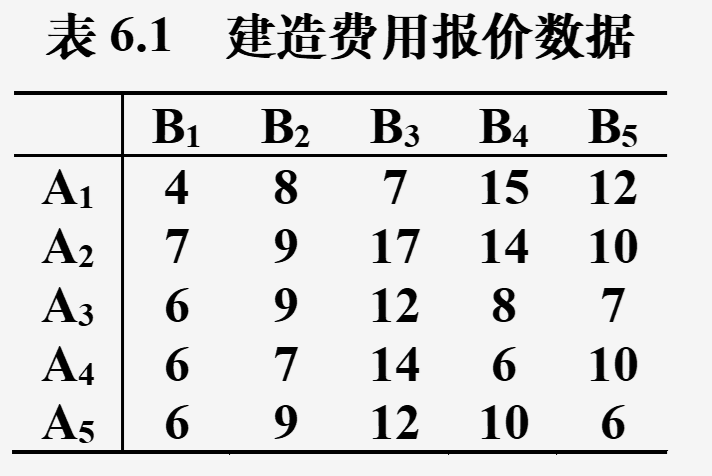

引进的0-1变量是$x_{ij}=1or0$ $A_i$承建\不承建$B_j$

求解如下：

In [17]:
import numpy as np
import cvxpy as cp
c = np.array([[4,8,7,15,12],
             [7,9,17,14,10],
             [6,9,12,8,7],
             [6,7,14,6,10],
             [6,9,12,10,6]])
x = cp.Variable((5,5),integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
constraints = [0<=x,
               x<=1,
               cp.sum(x,axis=0,keepdims=True)==1,
               cp.sum(x,axis=1,keepdims=True)==1]
problem = cp.Problem(obj,constraints)
problem.solve()

print("最优值：", problem.value)
print("最优解：", x.value)

最优值： 34.0
最优解： [[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


#### 广义指派模型
非标准形式，转化为标准形式。

1. 人数和任务数不等的指派问题  
对于这样的指派问题，通常的处理方式为：
   * 若人数少于任务数，则可添加一些虚拟的“人”。这些虚拟的人完成各项任务的效率取为0，理解为这些效率值实际上不会发生。
   * 若人数多于任务数，则可添加一些虚拟的“任务”。这些虚拟的任务被每个人完成的效率同样也取为0。
   
2. 一个人可完成多项任务的指派问题  
对于这样的指派问题，可将该人看作相同的几个人来接受指派，只需令其完成同一项任务的效率都一样即可。

3. 某项任务一定不能由某人完成的指派问题  
对于这样的指派问题，只需将相应的效率值（成本型）取成足够大的数即可。


# 三、非线性规划

分为有约束非线性规划、无约束线性规划。

### 1、最优性条件
对于无约束问题：

局部极小点必要条件：$f(x)$在点$\bar{x}$处可微，在$\bar{x}$处梯度$\bigtriangledown f(\bar{x})=0$   
局部极小点充分条件：$f(x)$在点$\bar{x}$处二次可微，梯度$\bigtriangledown f(\bar{x})=0$，且Hesse矩阵$\bigtriangledown ^2f(\bar{x})$正定  
凸函数全局极小点的充要条件是在$\bar{x}$处梯度$\bigtriangledown f(\bar{x})=0$   

### 2、有约束线性规划转化为无约束规划求解   
* 拉格朗日乘数法（只有等式约束）
* 罚函数法（有不等约束）

### 3、二次规划（可用库直接解）
若非线性规划的目标函数为决策向量 的二次函数，约束条件又全是线性的，就称这种规划为二次规划。  
cvxpy求解二次规划示例如下：
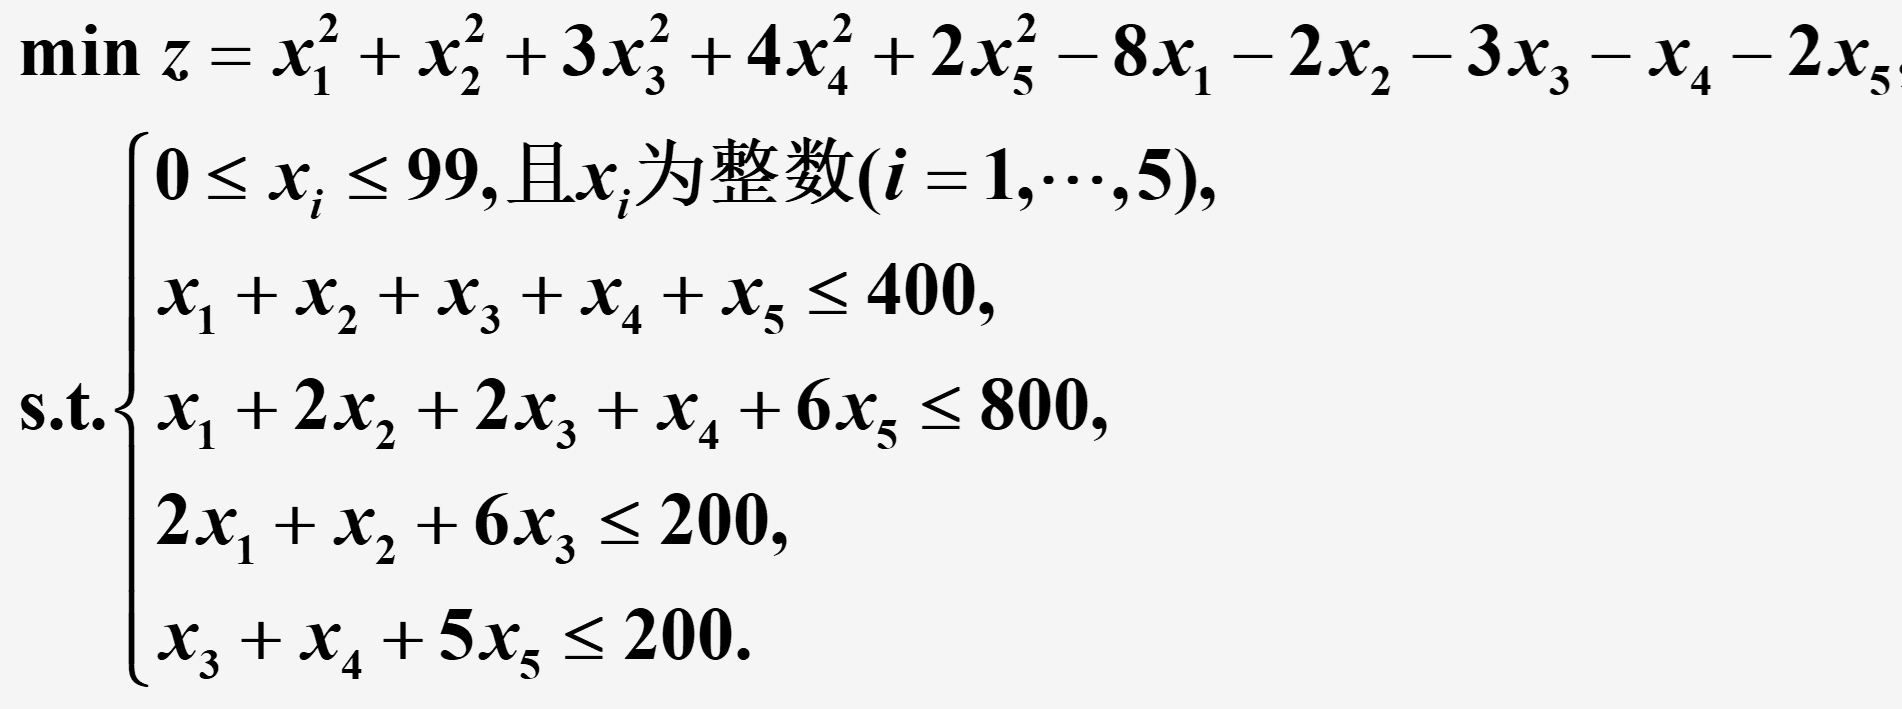

In [1]:
import numpy as np
import cvxpy as cp
c1 = np.array([1,1,3,4,2])
c2 = np.array([-8,-2,-3,-1,-2])
a = np.array([[1,1,1,1,1],
              [1,2,2,1,6],
              [2,1,6,0,0],
              [0,0,1,1,5]])
b = np.array([400,800,200,200])
x = cp.Variable(5)
obj = cp.Minimize(c1@x**2+c2@x)
con=[0<=x,
     x<=99,
     a@x<=b]
problem = cp.Problem(obj,con)
problem.solve()
print("最优值：",problem.value)
print("最优解：",x.value)

最优值： -18.3125
最优解： [4.    1.    0.5   0.125 0.5  ]


# 四、进阶：随机规划&鲁棒规划
随机规划和鲁棒优化都是运筹优化中比较高阶的内容。二者都是考虑不确定情形下的数学规划，但是两者又有不同。随机规划旨在优化不确定情形下的目标函数的期望等，比如总收益的期望值等。但是鲁棒优化致力于使得最坏的情况最好。所以相比而言，基本的鲁棒优化获得的结果会比较保守。

## 4.1 随机规划
随机规划是一种非常常用的用来处理不确定参数下的优化方法。

一般的规划问题形式如下：  
$$min z=c_1x_1+c_2x_2$$  
$$s.t.\left\{\begin{matrix}a_{11}x_1+a_{12}x_2\le b_1
 \\a_{21}x_1\le b_2
 \\a_{32}x_2\le b_3
\\x_1,x_2\ge 0
\end {matrix}\right.$$

我们假设所有参数，即$c,a,b$都是可以提前给定的。但是在实际的场景中，这些参数也许是**不确定的**，比如生产所需要的工时，可能会由于机器、人工的误差，导致一些波动。在实际生产活动中，由于随机的因素，可能导致真正的参数跟确定情形下考虑的参数不一致。

我们考虑模型的参数是不确定的情况，模型变成如下的情况：
$$min z=\tilde{c}_1x_1+\tilde{c}_2x_2$$
$$s.t.\left\{\begin{matrix}\tilde{a} _{11}x_1+\tilde{a} _{12}x_2\le \tilde{b} _1
 \\\tilde{a} _{21}x_1\le \tilde{b} _2
 \\\tilde{a} _{32}x_2\le \tilde{b} _3
\\x_1,x_2\ge 0
\end {matrix}\right.$$   
其中$\tilde{c},\tilde{a},\tilde{b}$表示这些参数是不确定的。但是这些参数又不是完全没有已知信息。我们假设他们的一些概率分布信息是已知的。比如均值、方差等。



### 举例
随机规划是一种建立在随机变量的概率分布上的数学规划模型，用于处理决策变量和/或约束条件中存在随机性因素的问题。随机规划建模的关键是建立随机变量的概率分布，以及将这些随机变量的统计特性（如均值、方差、协方差等）纳入到问题的约束条件和目标函数中。随机规划的求解则需要使用相关的数学工具和算法进行。

下面以一个简单的例子来说明随机规划的建模和求解过程：

假设有一家公司生产某种产品，需要在下个季度制定生产计划。该产品的销售量是一个随机变量，其概率分布为正态分布，均值为1000，标准差为200。假设该公司有两种生产方案：方案A和方案B。方案A的生产成本为500元/单位，方案B的生产成本为600元/单位。该公司的目标是在制定生产计划时，最小化生产成本的期望值。

随机规划的建模过程如下：

1. 定义决策变量

设$x_A$为采用方案A的生产量，$x_B$为采用方案B的生产量。

2. 定义目标函数

目标函数是生产成本的期望值，可以表示为：

$$
\text{min}\ 500x_A + 600x_B
$$

其中，$500x_A + 600x_B$是生产成本的总和。

3. 定义约束条件

由于销售量是一个随机变量，因此需要将其纳入约束条件中。假设销售量的概率分布为正态分布，均值为1000，标准差为200，可以将其表示为：

$$
p(q \leq q_0) \geq 0.95
$$

其中，$q$表示销售量，$q_0$表示公司计划生产的总量。约束条件的意义是，公司计划生产的总量$q_0$应该保证至少有95%的概率能够满足销售量的需求。将正态分布的概率转化为标准正态分布的概率，可以得到约束条件的形式为：

$$
\Phi\left(\frac{q_0 - 1000}{200}\right) \geq 0.95
$$

其中，$\Phi$表示标准正态分布的累积分布函数。这个约束条件可以进一步转化为：

$$
q_0 \geq 1000 + 200\Phi^{-1}(0.05)
$$

其中，$\Phi^{-1}$表示标准正态分布的反函数。

除了销售量的约束条件以外，还需要添加非负约束条件，即$x_A \geq 0$和$x_B \geq 0$。

4. 建立随机规划模型

综合上述步骤，可以得到随机规划模型：

$$
\begin{aligned}
\text{min}\ & 500x_A + 600x_B \\
\text{s.t.}\ & q_0 \geq 1000 + 200\Phi^{-1}(0.05) \\
& x_A \geq 0 \\
& x_B \geq 0
\end{aligned}
$$

随机规划的求解过程通常需要使用相关的数学工具和算法。常用的算法包括随机梯度下降法、蒙特卡罗法、随机搜索法等。这些算法的具体实现方式和求解效率会有所不同，需要根据具体问题的特点选择合适的算法进行求解。在实践中，通常会使用优化软件来求解随机规划问题。这些软件会提供多种求解算法和参数设置，以便用户能够根据具体问题的特点选择合适的求解方法。

---

*-未完待续，不定期更新-*